# Info
Name:  

    ORACLES_routine_4STAR

Purpose:  

    Compare the routine flights AOD from 4STAR as compared to climatology
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2016-11-08
    

# Prepare the python environment


In [1]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [4]:
import hdf5storage as hs

In [5]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\'

# Load files

## 4STAR ict

In [6]:
s = hs.loadmat(fp+'/aod_ict/all_aod_ict.mat')

In [7]:
s.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'AOD1559',
 u'AOD1064',
 u'fl_alt_6',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 u'AOD0452',
 u'fl1',
 u'fl2',
 u'qual_flag',
 u'AOD0520',
 u'AOD0501',
 u'Longitude',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'Start_UTC',
 u'days',
 u'AOD0781',
 u'fl_alt_18',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'GPS_Alt']

## MODIS climatology

In [8]:
fp

'C:\\Users\\sleblan2\\Research\\ORACLES\\'

In [9]:
m = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE.nc')

In [10]:
m.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee94a8>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee9048>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee9be0>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee9c50>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x176cd2b0>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee9b70>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x17ee9198>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee93c8>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee9470>,
 'TTOP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x17ee92e8>}

In [48]:
m2 = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE_all.nc')

In [49]:
m2.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x210139e8>,
 'AODFM_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013c18>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x210139b0>,
 'AOD_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013be0>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013b38>,
 'CFTOTAL_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013d30>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013ba8>,
 'CFWATER_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013d68>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x20f3ff60>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013ac8>,
 'LWP_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013cf8>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x21013978>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013a58>,
 'ND_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013c88>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x21013a20>,
 'RE_YRME

In [51]:
m2.variables['AOD_YRMEAN'].data

array([[[  4.45985824e-01,   3.16387504e-01,   4.47000027e-01,
           8.71484339e-01,   6.73612475e-01,   5.81343710e-01,
           6.06093705e-01,   7.24328101e-01,   4.81757790e-01,
           6.65496051e-01,   5.68125010e-01,   6.30671918e-01,
           4.47281301e-01],
        [  6.00991130e-01,   2.33999997e-01,   4.49828148e-01,
           5.96606255e-01,   9.68437493e-01,   4.23656255e-01,
           7.11187482e-01,   8.00290227e-01,   4.74393755e-01,
           7.59496868e-01,   6.33599997e-01,   6.27206206e-01,
           4.79400009e-01],
        [  6.49343789e-01,   3.15412521e-01,   4.47806269e-01,
           6.34007812e-01,   8.89218628e-01,   3.55612516e-01,
           1.10685265e+00,   7.81138361e-01,   5.31000018e-01,
           7.60229230e-01,   1.00565624e+00,   6.71687543e-01,
           8.14992189e-01],
        [  5.48212469e-01,   3.54000002e-01,   3.95793736e-01,
           7.72031248e-01,   7.11503863e-01,   4.88006204e-01,
           6.20156229e-01,   9.885

# Subset for routine flight

In [11]:
d_rtn = ['20160831','20160904','20160908','20160910','20160912','20160925']

In [14]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [15]:
s['days'][0]

0.0

In [191]:
ff = []
for d in d_irtn:
    ff.append(s['days']==d)

In [192]:
for i,f in enumerate(ff):
    if i==0:
        fl = f[0]
    else:
        fl = fl | f

In [31]:
s['fl_rtn'] = fl & s['fl']

# Now plot the routine flight aods

## all points

<IPython.core.display.Javascript object>


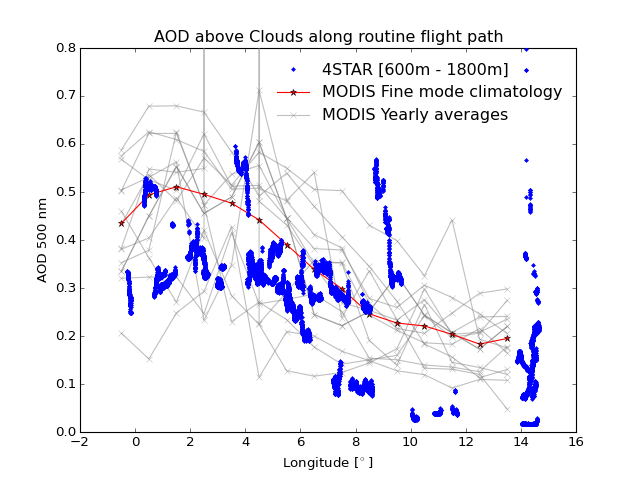

In [150]:
plt.figure()
plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',zorder=100)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
plt.savefig(fp+'plot\\Climat_AAC_4STAR_all_MODIS.png',transparent=True,dpi=600)

## heat map of points

<IPython.core.display.Javascript object>


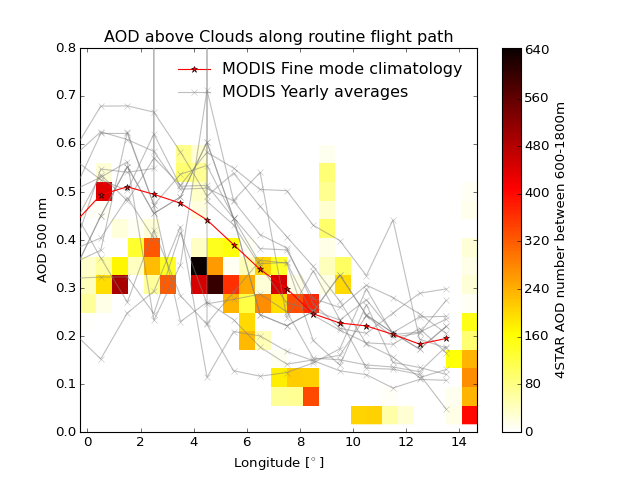

In [152]:
plt.figure()
cc = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=25,cmap=plt.cm.hot_r)
cb = plt.colorbar()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
cb.set_label('4STAR AOD number between 600-1800m')
plt.savefig(fp+'plot\\Climat_AAC_4STAR_hist_MODIS.png',transparent=True,dpi=600)

## Use bins from heat map to make box whisker plot

In [109]:
bins = []
pos = []
for i,c in enumerate(cc[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc[1][i+1])
    bins.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos.append((c+cc[1][i+1])/2.0)

In [134]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

<IPython.core.display.Javascript object>


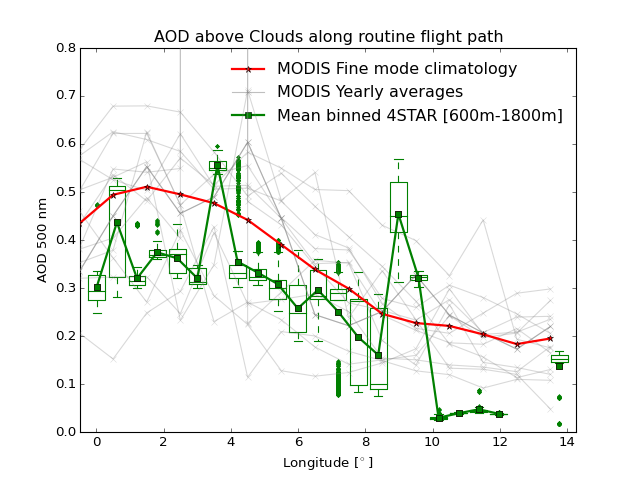

In [151]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.3,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
#[plt.setp(bo['fliers'][idx],alpha=0.5,)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


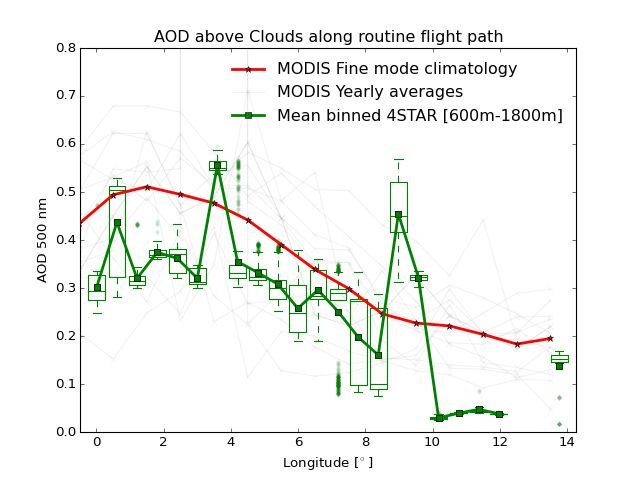

In [156]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_simpler_MODIS.png',transparent=True,dpi=600)

## Make another binning product, with less bins

<IPython.core.display.Javascript object>


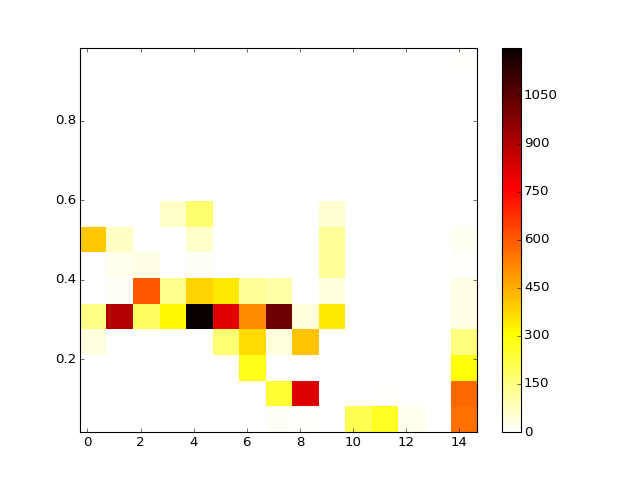

In [159]:
plt.figure()
cc2 = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=15,cmap=plt.cm.hot_r)
cb = plt.colorbar()

In [160]:
bins2 = []
pos2 = []
for i,c in enumerate(cc2[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc2[1][i+1])
    bins2.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos2.append((c+cc2[1][i+1])/2.0)

<IPython.core.display.Javascript object>


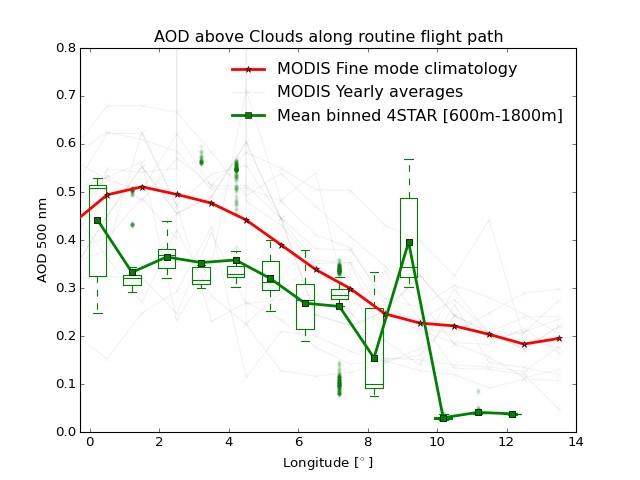

In [162]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins2,0,'g.',showmeans=True,positions=pos2)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos2,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box2_simpler_MODIS.png',transparent=True,dpi=600)

## Now try with same bins as MODIS

In [165]:
pos3 = m.variables['LONGITUDE'].data[0,:]

In [166]:
pos3

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5], dtype=float32)

In [185]:
lims3 = pos3-0.5
lims3= np.append(lims3,pos3[-1]+0.5)

In [186]:
bins3 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<lims3[i+1])
    bins3.append(s['AOD0501'][s['fl_rtn']][lon_fl])

In [187]:
len(lims3)

16

In [188]:
len(bins3)

15

In [189]:
len(pos3)

15

<IPython.core.display.Javascript object>


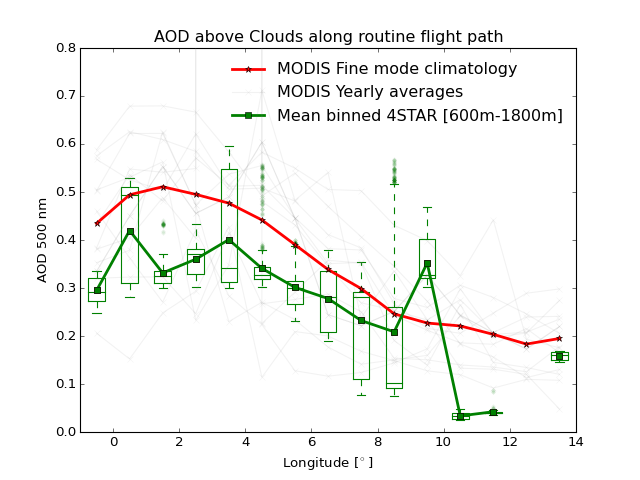

In [190]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_MODIS.png',transparent=True,dpi=600)

In [204]:
s['fl_alt12'] = (s['GPS_Alt']>=600)&(s['GPS_Alt']<1200)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [205]:
s['fl_alt12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [206]:
s['fl_rtn_12'] = s['fl_alt12'] & s['fl_QA'] & fl

In [207]:
s['fl_rtn_12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [208]:
bins3_12 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn_12']]>=c)&(s['Longitude'][s['fl_rtn_12']]<lims3[i+1])
    bins3_12.append(s['AOD0501'][s['fl_rtn_12']][lon_fl])

<IPython.core.display.Javascript object>


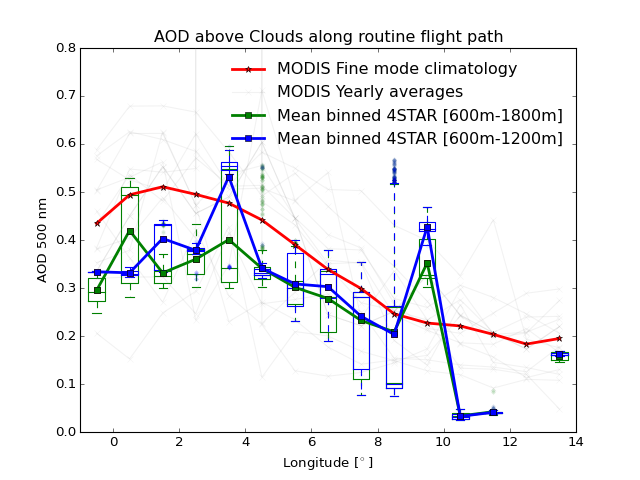

In [209]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)

bo2 = plt.boxplot(bins3_12,0,'b.',showmeans=True,positions=pos3)
color_box(bo2,'blue')
[plt.setp(bo2['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo2['means']],'s-',zorder=100,color='blue',label='Mean binned 4STAR [600m-1200m]',lw=2.5)

plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_2alt_MODIS.png',transparent=True,dpi=600)

## make a plot day by day

In [210]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [211]:
flr2 = s['fl_rtn_12']&(s['days']==2.0)
flr4 = s['fl_rtn_12']&(s['days']==4.0)
flr6 = s['fl_rtn_12']&(s['days']==6.0)
flr7 = s['fl_rtn_12']&(s['days']==7.0)
flr8 = s['fl_rtn_12']&(s['days']==8.0)
flr13 = s['fl_rtn_12']&(s['days']==13.0)

In [212]:
fr2 = s['fl_rtn']&(s['days']==2.0)
fr4 = s['fl_rtn']&(s['days']==4.0)
fr6 = s['fl_rtn']&(s['days']==6.0)
fr7 = s['fl_rtn']&(s['days']==7.0)
fr8 = s['fl_rtn']&(s['days']==8.0)
fr13 = s['fl_rtn']&(s['days']==13.0)

In [213]:
fr = [fr2,fr4,fr6,fr7,fr8,fr13]
flr = [flr2,flr4,flr6,flr7,flr8,flr13]

In [217]:
cls = ['green','blue','yellow','cyan','magenta','orange']

In [214]:
d_rtn

['20160831', '20160904', '20160908', '20160910', '20160912', '20160925']

<IPython.core.display.Javascript object>


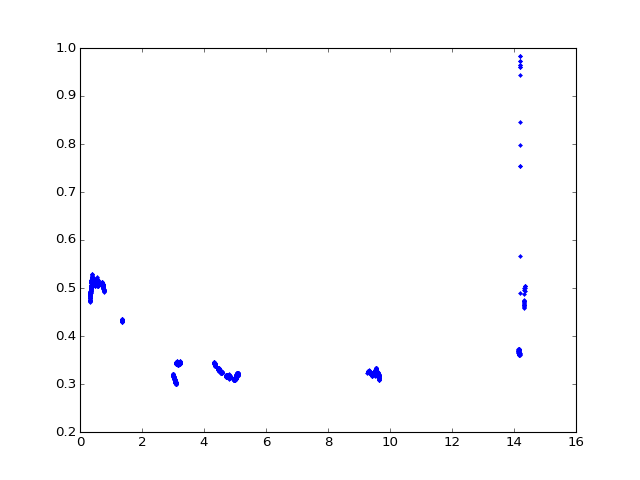

In [236]:
plt.figure()
plt.plot(s['Longitude'][f],s['AOD0501'][f],'.')

<IPython.core.display.Javascript object>


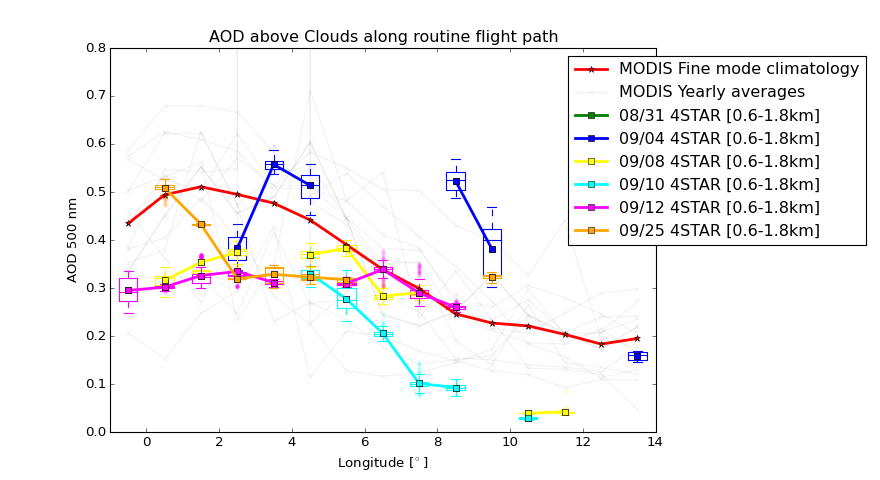

In [276]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),lw=2.5)

plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_MODIS.png',transparent=True,dpi=600)

## Make an average from daily averages

<IPython.core.display.Javascript object>


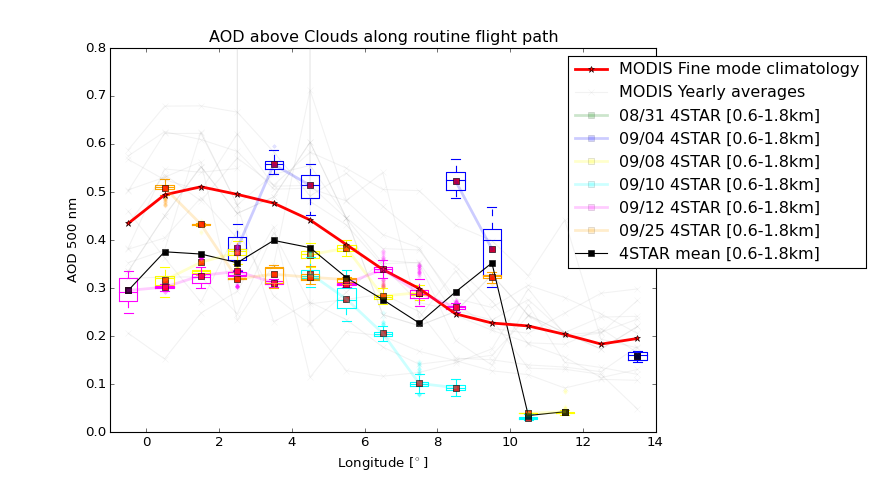

In [287]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.8km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


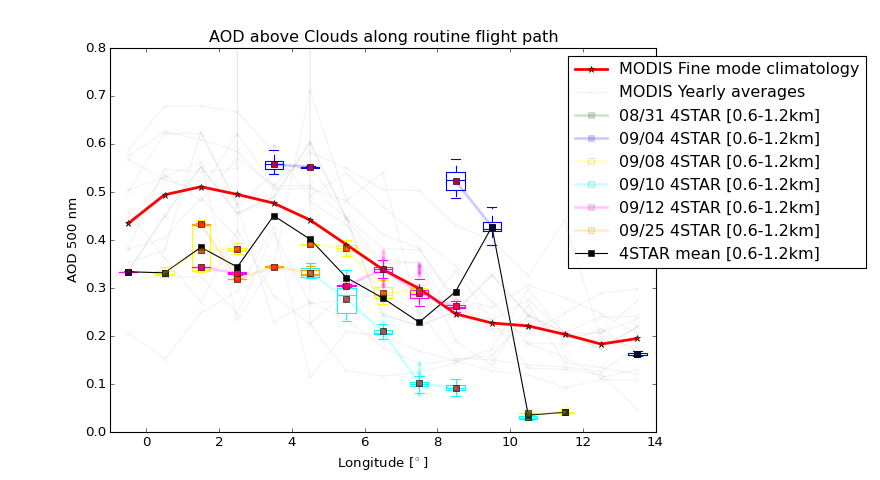

In [288]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.2km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_12_MODIS.png',transparent=True,dpi=600)

## Redo plots for entire column 

In [289]:
s['fl_alt_6'] = (s['GPS_Alt']<=600)
s['fl_rtn_6'] = s['fl_alt_6'] & s['fl_QA'] & fl
flrr2 = s['fl_rtn_6']&(s['days']==2.0)
flrr4 = s['fl_rtn_6']&(s['days']==4.0)
flrr6 = s['fl_rtn_6']&(s['days']==6.0)
flrr7 = s['fl_rtn_6']&(s['days']==7.0)
flrr8 = s['fl_rtn_6']&(s['days']==8.0)
flrr13 = s['fl_rtn_6']&(s['days']==13.0)
flrr = [flrr2,flrr4,flrr6,flrr7,flrr8,flrr13]

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


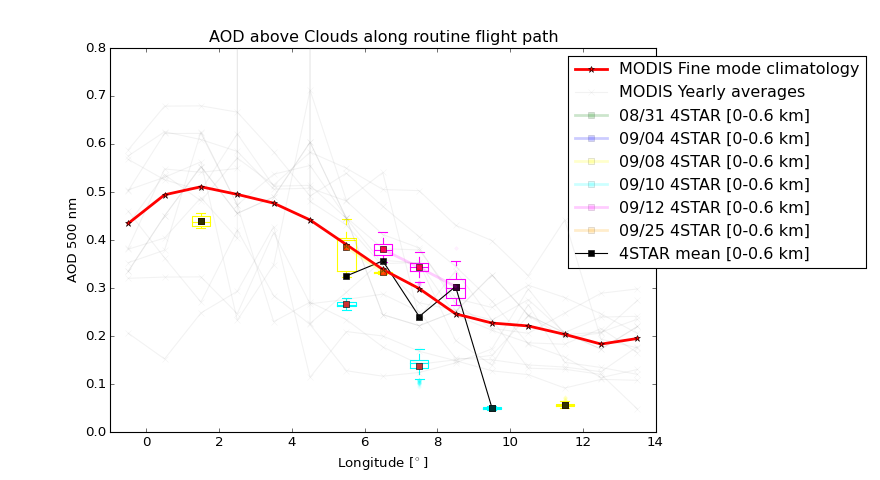

In [290]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flrr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0-0.6 km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0-0.6 km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_surf_MODIS.png',transparent=True,dpi=600)